### End 2 nd DataScience Project
 - WOrkflow
 - Data Prep
 - EDA
 - KE
 - Recommendation System
 - ML Predictive Analysis
 - Productionized with Streamlit/Flask

In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Hide All Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset
df = pd.read_csv("Data/udemy_courses.csv")

In [5]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


### Questions
+ Course Title
	- What is the most frequent words in course title
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

### EDA on Subject/Category
 - Subjects/Category
 - What is the distribution of subjects
 - How many courses per subject
 - Distribution of subjects per year
 - How many people purchase a particular subject
 - Which subject is the most popular


In [6]:
df.columns


Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [7]:
# How many subject/category are there in the dataset
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [8]:
# How many subject/category are there in the dataset
len(df['subject'].unique())


4

In [9]:
# Distribution of Subject/Value Counts
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

<AxesSubplot:>

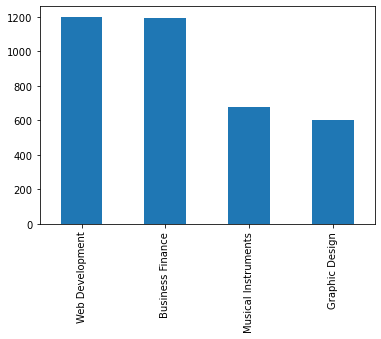

In [10]:
# Plot Distribution of Subject/Value Counts
df['subject'].value_counts().plot(kind='bar')


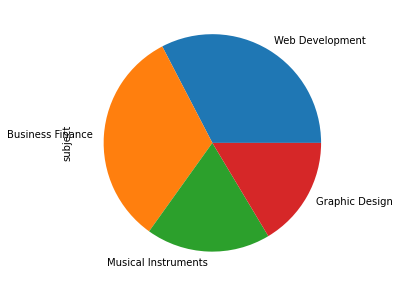

In [11]:
# Plot Distribution of Subject/Value Counts with Pie Chart
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

 ### EDA on Subscribers
+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

In [12]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [13]:
# Number of Courses per Subject
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [14]:
# Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7980572
Name: num_subscribers, dtype: int64

<AxesSubplot:xlabel='subject'>

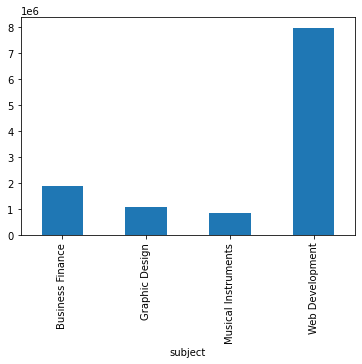

In [15]:
# Plot of the Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')


<AxesSubplot:ylabel='num_subscribers'>

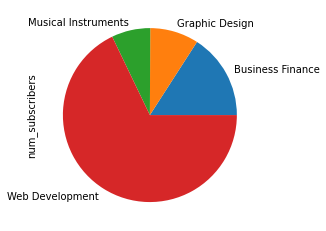

In [16]:
# Plot of the Number of subscribers per Subject
df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

### Narrative
 - More subscribers for Web dev than Business Finance
 - The top subject category is Web Dev, Business Finance

In [17]:
# Total Number of Subscribers
df['num_subscribers'].sum()


11759120

In [18]:
##Average number of subscribers
df['num_subscribers'].mean()


3197.150625339859

In [19]:
# Min number of subscriber
df['num_subscribers'].min()

0

In [20]:
# Max number of subscriber
df['num_subscribers'].max()

268923

In [21]:
# Which course has the highest number of sub
df['num_subscribers'].idxmax()

2827

In [22]:
# Get the location
df.iloc[2832]

course_id                                                         984072
course_title           Build Modern Websites Quick With HTML,CSS and ...
url                    https://www.udemy.com/build-modern-websites-qu...
is_paid                                                             True
price                                                                 20
num_subscribers                                                      912
num_reviews                                                           17
num_lectures                                                          48
level                                                     Beginner Level
content_duration                                                     4.5
published_timestamp                                 2016-10-18T15:48:43Z
subject                                                  Web Development
Name: 2832, dtype: object

### Narrative
 - Udemy has over 11 million subscribers
 - Highest num of sub: 268923
 - Average num of sub: 3193 

### EDA on Levels
- How many levels do we have 
- What is the distribution of courses per levels 
- Which subject have the highest levels 
- How many subscribers per levels 
- How many courses per levels

In [23]:
# How many levels do we have
df['level'].unique()


array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [24]:
# What is the distribution of courses per levels
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<AxesSubplot:>

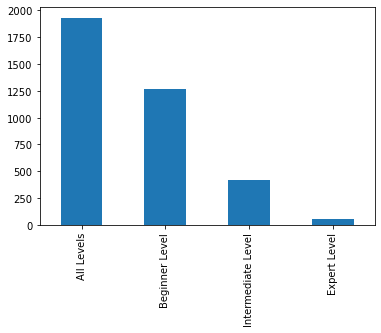

In [25]:
# What is the distribution of courses per levels
df['level'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='level'>

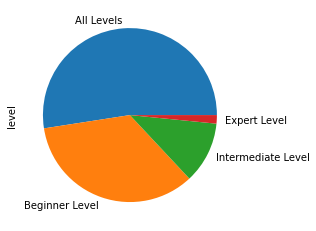

In [26]:
# What is the distribution of courses per levels
df['level'].value_counts().plot(kind='pie')

In [27]:
#  How many subscribers per levels
df.groupby('level')['num_subscribers'].sum()

level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

In [28]:
df[['num_subscribers','level']]

,num_subscribers,level
0,2147,All Levels
1,2792,All Levels
2,2174,Intermediate Level
3,2451,All Levels
4,1276,Intermediate Level
...,...,...
3673,1040,All Levels
3674,306,Beginner Level
3675,513,All Levels
3676,300,All Levels


<AxesSubplot:xlabel='level'>

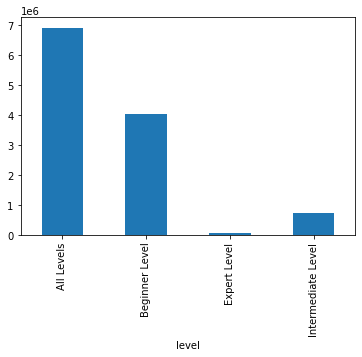

In [29]:
# Plot of How many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='bar')

<AxesSubplot:ylabel='num_subscribers'>

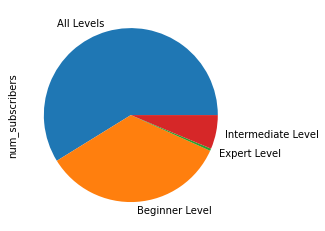

In [30]:
#  How many subscribers per levels
df.groupby('level')['num_subscribers'].sum().plot(kind='pie')


In [31]:
# How many levels per subject category
df.groupby('subject')['level'].value_counts()


subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

<AxesSubplot:xlabel='subject,level'>

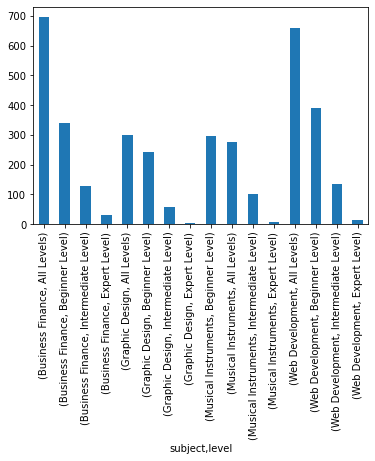

In [32]:
# Plot of How many levels per subject category
df.groupby('subject')['level'].value_counts().plot(kind='bar')


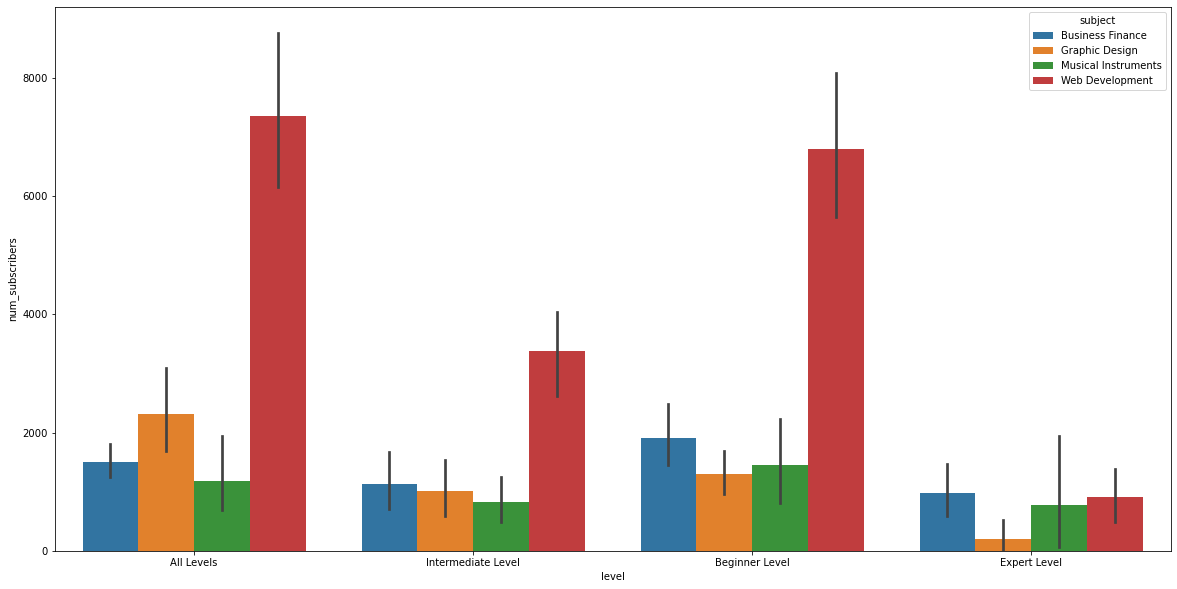

In [33]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df)
plt.show()


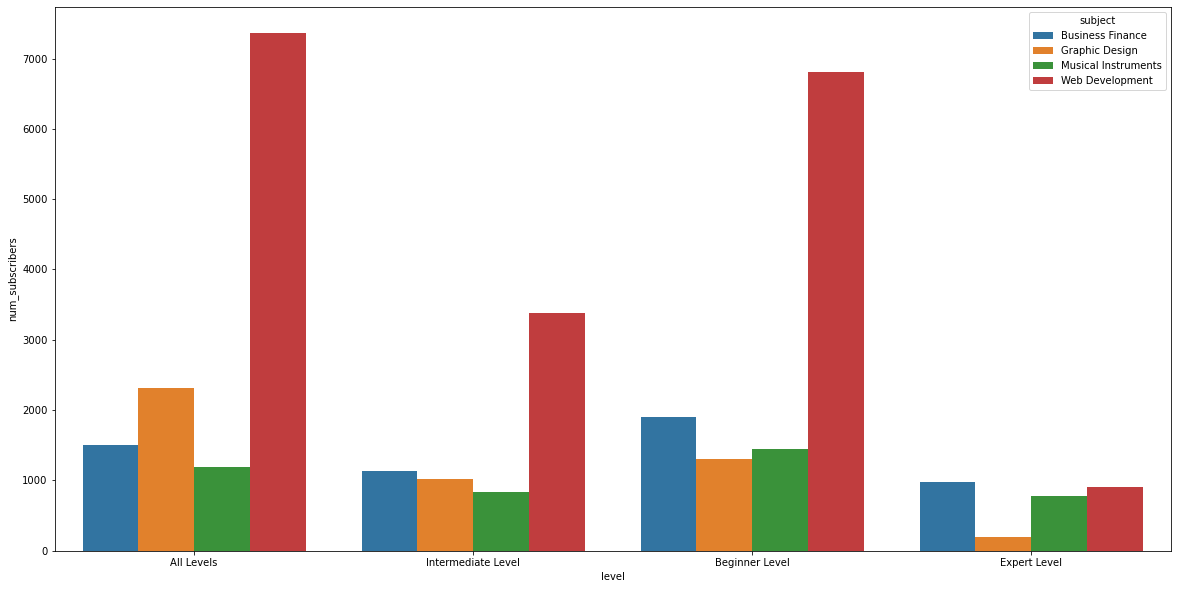

In [34]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_subscribers', hue='subject',data=df,ci=None)
plt.show()

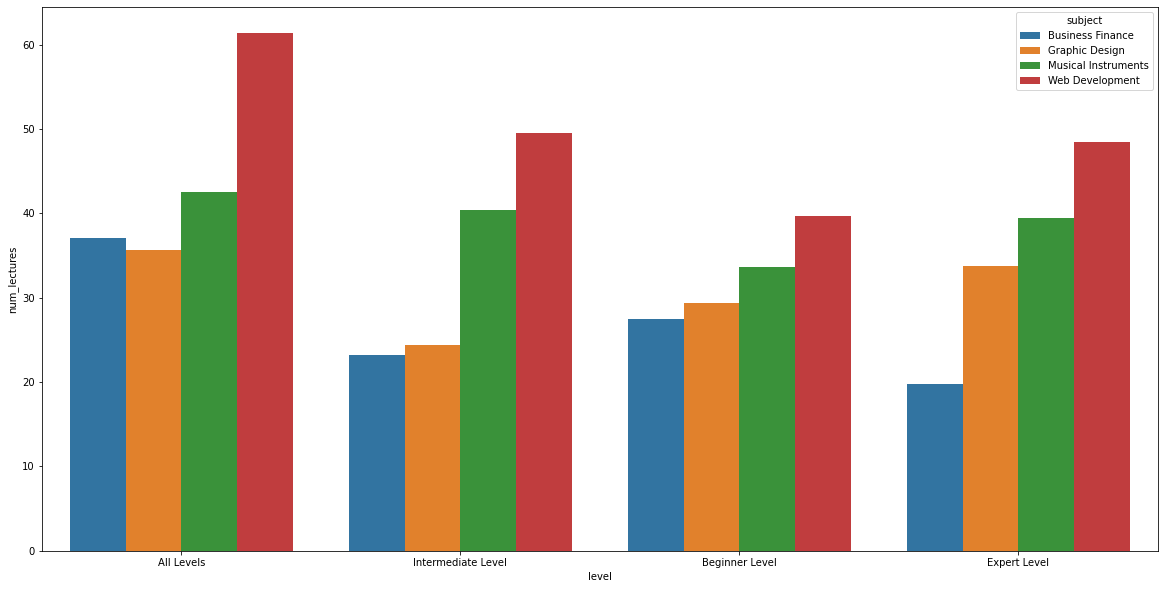

In [35]:
# Using Seaborn 
plt.figure(figsize=(20,10))
sns.barplot(x='level',y='num_lectures', hue='subject',data=df,ci=None)
plt.show()

In [36]:
# EDA on Lectures
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [37]:
def plot_num_of_countable_feature(feature):
    # Using Seaborn 
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x='level',y=feature, hue='subject',data=df,ci=None)
    plt.show()
    plt.figure(figsize=(10,7))
    #  How many subscribers per levels
    plt.title("Plot of {} per level".format(feature))
    df.groupby('level')[feature].sum().plot(kind='pie')
    plt.show()

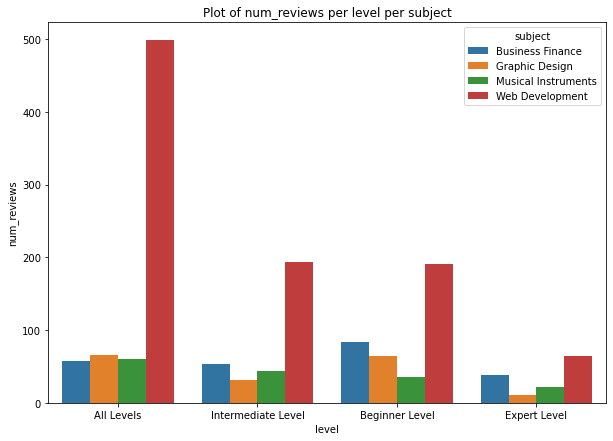

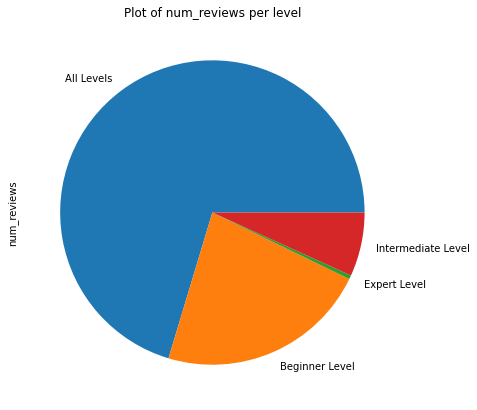

In [38]:
# Plot For the lectures * reviews
plot_num_of_countable_feature('num_reviews')

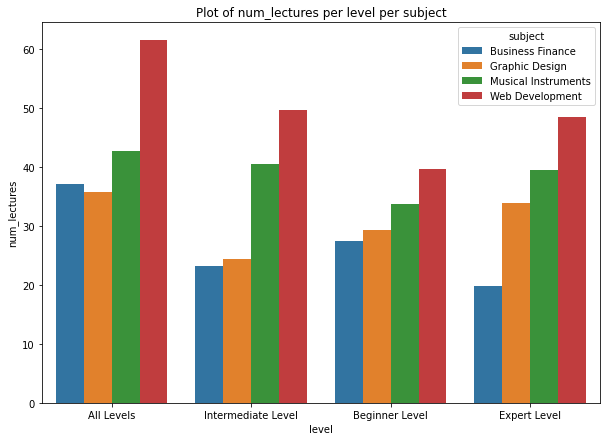

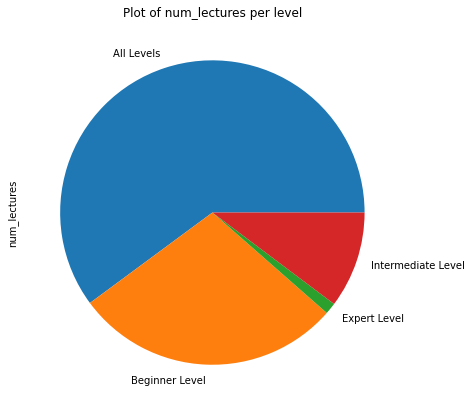

In [39]:
# Plot of lectures
plot_num_of_countable_feature('num_lectures')

### EDA on Price
+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

In [40]:
# Datatype
df['price'].dtype

dtype('int64')

In [41]:
# unique price
df.price.unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [42]:
# What is the average price
df['price'].mean()

66.0494834148994

In [43]:
# What is the max price
df['price'].max()

200

In [44]:
# What is the max price location
df['price'].idxmax()


0

In [45]:
df.iloc[0]


course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                                200
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                                     1.5
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
Name: 0, dtype: object

In [46]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']


In [47]:
# What is the most profitable
df['profit'].max()


24316800

### Narative
 - Most profitable course made 24 million $


In [48]:
# The location of course
df['profit'].idxmax()

3230

In [49]:
df.iloc[3235]

course_id                                                         866696
course_title                                 REST WCF Service in ASP.NET
url                    https://www.udemy.com/rest-wcf-service-in-aspnet/
is_paid                                                            False
price                                                                  0
num_subscribers                                                     7905
num_reviews                                                          561
num_lectures                                                           5
level                                                         All Levels
content_duration                                                0.683333
published_timestamp                                 2016-06-08T17:28:16Z
subject                                                  Web Development
profit                                                                 0
Name: 3235, dtype: object

### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

<AxesSubplot:xlabel='price', ylabel='num_subscribers'>

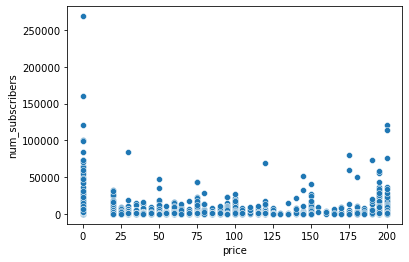

In [50]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

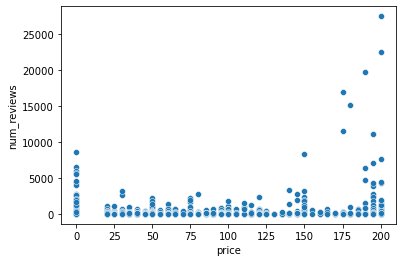

In [51]:
sns.scatterplot(data=df,x='price',y='num_reviews')


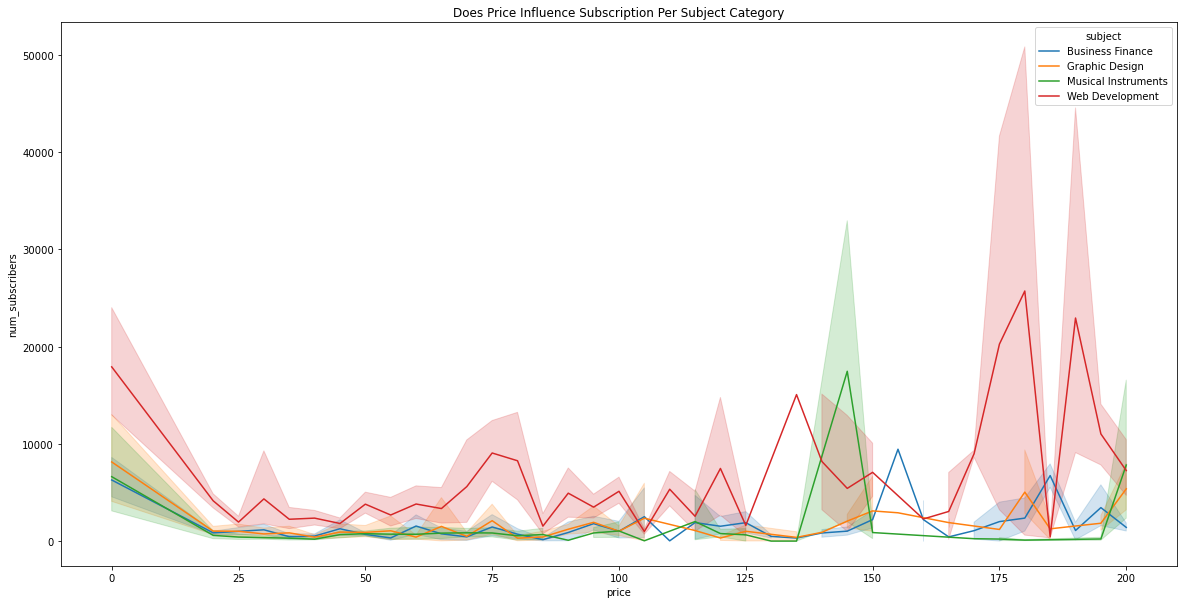

In [52]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

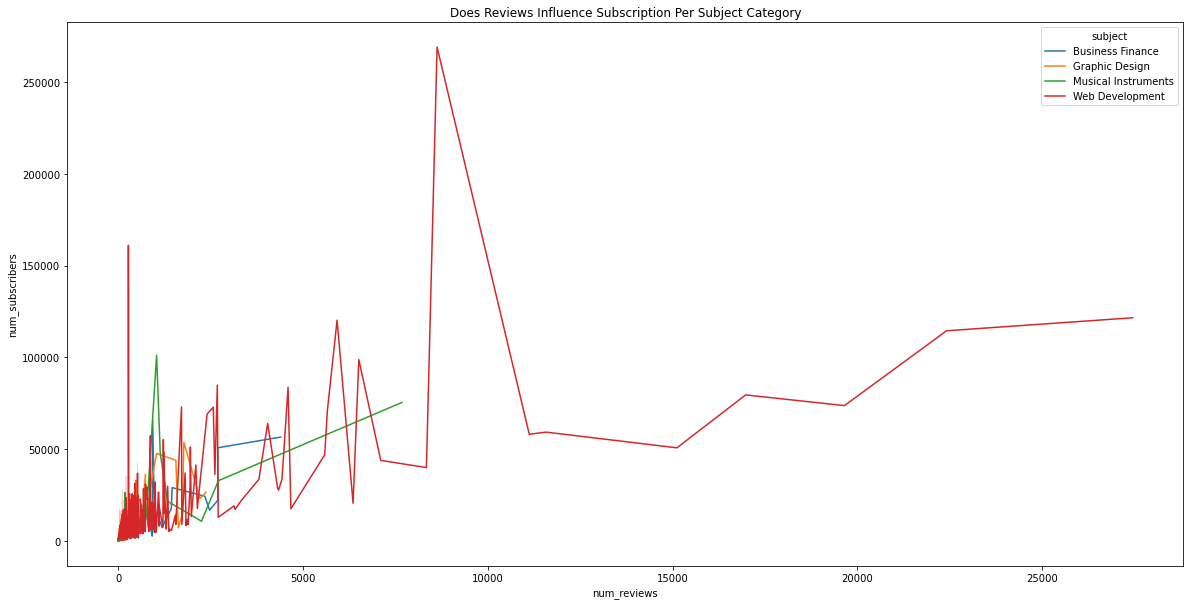

In [53]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

### Question on Time
 - Published Year
 - Number of courses per year
 - Distribution of subjects per year
 - Which year has the highest number of courses
 - What is the trend of courses per year


In [54]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200


In [55]:
df['published_timestamp'].dtype


dtype('O')

In [56]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [57]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3673    [2016-06-14, 17:36:46Z]
3674    [2017-03-10, 22:24:30Z]
3675    [2015-12-30, 16:41:42Z]
3676    [2016-08-11, 19:06:15Z]
3677    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3678, dtype: object

In [58]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [59]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [60]:
from datetime import datetime
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [61]:
df['published_date'] = df['published_date'].str.replace('3 hours','2017-01-18')

In [62]:
convert_to_dt("2017-01-18")

'2017-01-18'

In [63]:
df['published_date'].apply(lambda x: convert_to_dt(x))

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3673    2016-06-14
3674    2017-03-10
3675    2015-12-30
3676    2016-08-11
3677    2014-09-28
Name: published_date, Length: 3678, dtype: object

In [64]:
df['published_date'] = df['published_date'].apply(lambda x: convert_to_dt(x))

In [65]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
profit                   int64
published_date          object
dtype: object

In [66]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [67]:
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                           int64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration              float64
published_timestamp            object
subject                        object
profit                          int64
published_date         datetime64[ns]
dtype: object

In [68]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day


In [69]:
df.groupby('year')['num_subscribers'].value_counts()

year  num_subscribers
2011  3697               1
      7014               1
      12458              1
      26673              1
      69186              1
                        ..
2017  15276              1
      16158              1
      16829              1
      17784              1
      26742              1
Name: num_subscribers, Length: 2893, dtype: int64

<AxesSubplot:xlabel='year,num_subscribers'>

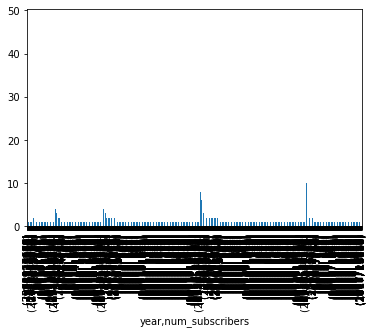

In [70]:
# Plot of Sub Per Year
df.groupby('year')['num_subscribers'].value_counts().plot(kind='bar')

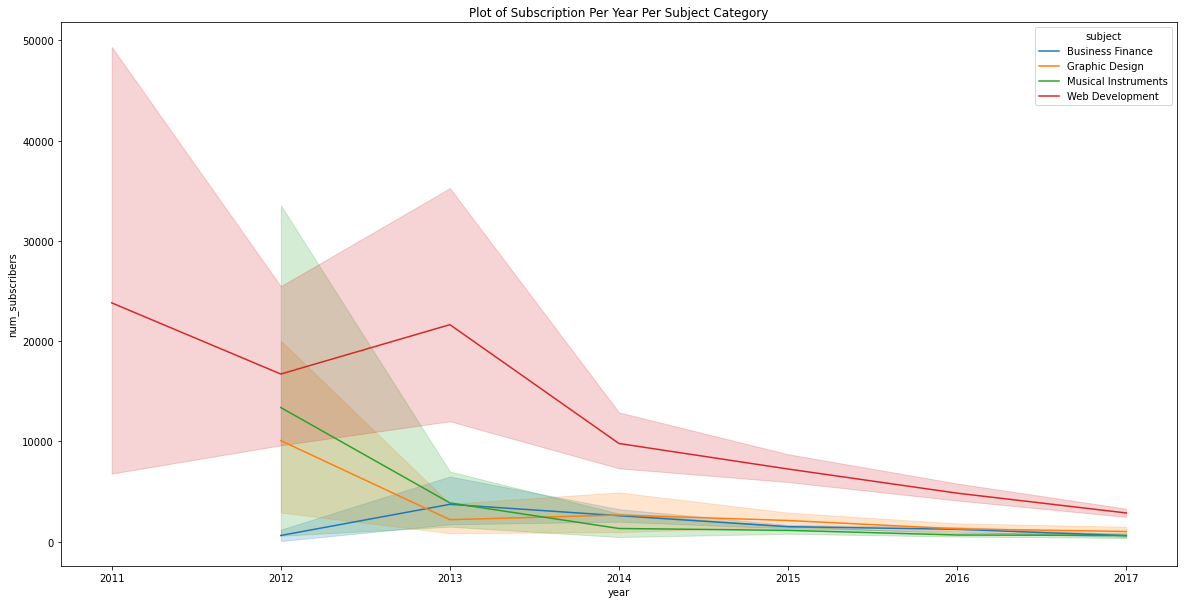

In [71]:
plt.figure(figsize=(20,10))
plt.title("Plot of Subscription Per Year Per Subject Category")
sns.lineplot(data=df,x='year',y='num_subscribers',hue='subject')
plt.show()


### Questions on Course Title
 - Course Title
 - What is the most frequent words in course title
 - Longest/Shortest course title
 - How can we build recommendation systems via title using similarity
 - Most famous courses by number of subscribers

In [72]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,2016,12,13


In [73]:
# Get the Longest Title for a course
df['course_title'].str.len()


0       34
1       59
2       56
3       50
4       44
        ..
3673    56
3674    55
3675    29
3676    54
3677    52
Name: course_title, Length: 3678, dtype: int64

In [74]:
# Get the Longest Title for a course
df['course_title_len'] = df['course_title'].str.len()

In [75]:
# Get Longest title
df['course_title_len'].max()

243

In [76]:
# Get tlocation
df.iloc[243]

course_id                                                         337320
course_title           Cash Flow Valuation: Develop Your Financial Li...
url                     https://www.udemy.com/financial-literacy-basics/
is_paid                                                             True
price                                                                105
num_subscribers                                                     2987
num_reviews                                                           23
num_lectures                                                          19
level                                                         All Levels
content_duration                                                       2
published_timestamp                                 2014-12-22T13:39:16Z
subject                                                 Business Finance
profit                                                            313635
published_date                                     

### Keyword Extraction
- Rake
- Yakes
- Collection

In [77]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3673    Learn jQuery from Scratch - Master of JavaScri...
3674    How To Design A WordPress Website With No Codi...
3675                        Learn and Build using Polymer
3676    CSS Animations: Create Amazing Effects on Your...
3677    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3678, dtype: object

In [78]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [79]:
dir(nfx)


['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [80]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)


In [81]:
df[['clean_title','course_title']]


,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [82]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)


In [83]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673      Learn jQuery Scratch  Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676        CSS Animations Create Amazing Effects Website
3677              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3678, dtype: object

In [84]:
# Tokenization
all_title_list = df['clean_title'].to_list()

In [85]:
all_title_list[1:100]

['Complete GST Course  Certification  Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro  Financial Analysis Excel 2017',
 'Maximize Profits Trading Options',
 'Trading Penny Stocks Guide Levels 2017',
 'Investing Trading Beginners Mastering Price Charts',
 'Trading Stock Chart Patterns Immediate Explosive Gains',
 'Options Trading 3  Advanced Stock Profit Success Method',
 'Investment Strategy Need Retirement',
 'Forex Trading Secrets Pros Amazons AWS',
 'Trading Options Money Flow',
 'Financial Management Risk Return Securities',
 'Forex Trading Course Work Smarter Harder Proven Results',
 'Python Algo Trading Sentiment Trading News',
 'Short Selling Learn Sell Stocks Fall',
 'Basic Technical Analysis Learn structure market',
 'Complete Chart Pattern Trading Course Proven Approach',
 '7 Deadly Mistakes Investing Slash Profits',
 'Financial Statements Easy',
 'Winning Forex Trading Live Forex Trading Examples',
 'Forex Traders  Create Trading Robot Cod

In [86]:
for line in all_title_list[1:5]:
    print(line.split())
    for i in line.split():
        print(i)

['Complete', 'GST', 'Course', 'Certification', 'Grow', 'Practice']
Complete
GST
Course
Certification
Grow
Practice
['Financial', 'Modeling', 'Business', 'Analysts', 'Consultants']
Financial
Modeling
Business
Analysts
Consultants
['Beginner', 'Pro', 'Financial', 'Analysis', 'Excel', '2017']
Beginner
Pro
Financial
Analysis
Excel
2017
['Maximize', 'Profits', 'Trading', 'Options']
Maximize
Profits
Trading
Options


In [87]:
# Convert list to tokens
all_tokens = [i for line in all_title_list for i in line.split()]


In [88]:
all_tokens


['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'GST',
 'Course',
 'Certification',
 'Grow',
 'Practice',
 'Financial',
 'Modeling',
 'Business',
 'Analysts',
 'Consultants',
 'Beginner',
 'Pro',
 'Financial',
 'Analysis',
 'Excel',
 '2017',
 'Maximize',
 'Profits',
 'Trading',
 'Options',
 'Trading',
 'Penny',
 'Stocks',
 'Guide',
 'Levels',
 '2017',
 'Investing',
 'Trading',
 'Beginners',
 'Mastering',
 'Price',
 'Charts',
 'Trading',
 'Stock',
 'Chart',
 'Patterns',
 'Immediate',
 'Explosive',
 'Gains',
 'Options',
 'Trading',
 '3',
 'Advanced',
 'Stock',
 'Profit',
 'Success',
 'Method',
 'Investment',
 'Strategy',
 'Need',
 'Retirement',
 'Forex',
 'Trading',
 'Secrets',
 'Pros',
 'Amazons',
 'AWS',
 'Trading',
 'Options',
 'Money',
 'Flow',
 'Financial',
 'Management',
 'Risk',
 'Return',
 'Securities',
 'Forex',
 'Trading',
 'Course',
 'Work',
 'Smarter',
 'Harder',
 'Proven',
 'Results',
 'Python',
 'Algo',
 'Trading',
 'Sentiment',
 'Trading',
 'News',
 'Short

In [89]:
from collections import Counter

In [90]:
word_freq = Counter(all_tokens)


In [91]:
# TOp Words
dict(word_freq.most_common(30))

{'Learn': 491,
 'Trading': 280,
 'Beginners': 246,
 'Course': 231,
 'Guitar': 208,
 'Web': 205,
 'Design': 187,
 'Complete': 181,
 'Piano': 177,
 'Photoshop': 166,
 'Forex': 163,
 'Build': 161,
 'Financial': 138,
 'Create': 135,
 'JavaScript': 123,
 'Beginner': 120,
 'Guide': 116,
 'HTML': 116,
 'Accounting': 111,
 'Website': 110,
 'Development': 110,
 '2': 106,
 'PHP': 105,
 'Options': 101,
 'Adobe': 100,
 'Play': 98,
 '1': 97,
 'de': 97,
 'Introduction': 93,
 'CSS': 92}

In [92]:
top_words = dict(word_freq.most_common(50))

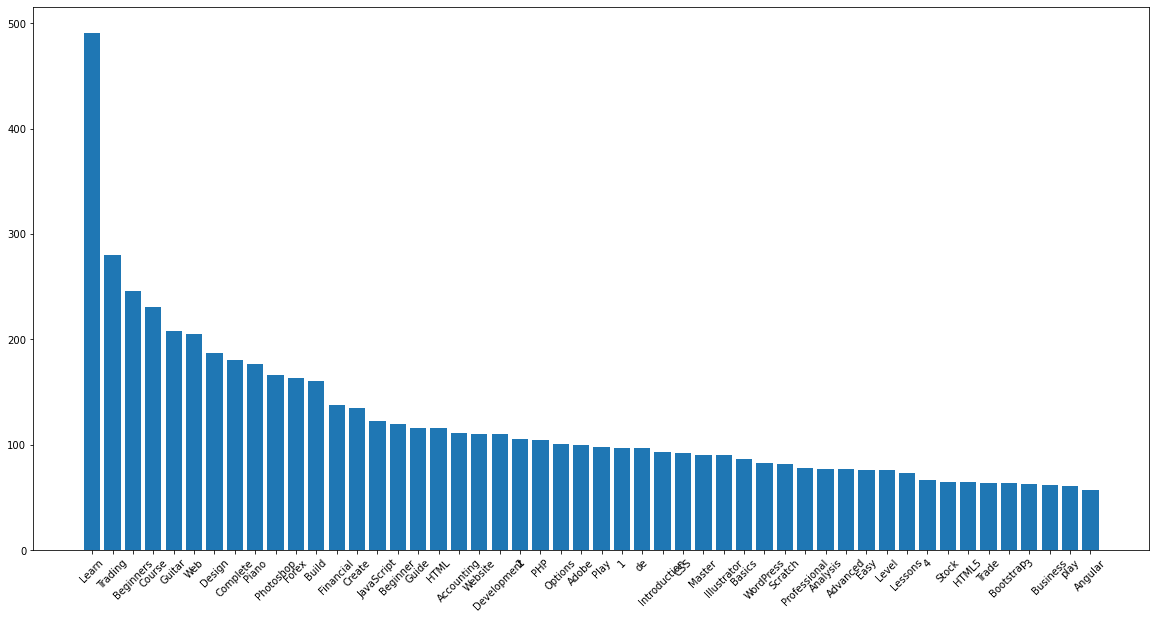

In [93]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*top_words.items()))
plt.xticks(rotation=45)
plt.show()
